# Лабораторная работа №5
**Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений**

**Выполнили** студенты группы 2383 Борисов И.П., Иваницкий И.А.

**Цель работы.** Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

---



# Теоретические основы цифровой обработки сигналов

## 1. Дискретизация сигнала

### Параметры дискретизации
- **Шаг дискретизации**: $T = 1$
- **Количество отсчётов**: $N = 32$
- **Дискретное время**: $n = 0, 1, 2, \dots, N-1$

### Модель сигнала
Сигнал формируется как сумма гармонических составляющих:
$$
x[n] = \sum_{k=0}^{10} A_k \cos(\omega_k^{(sig)} n + \varphi_k)
$$

### Параметры гармоник
1. **Частоты гармоник исходного сигнала**:
   $$
   \omega_k^{(sig)} = k \cdot 0.1\pi, \quad k = 0, 1, 2, \dots, 10
   $$
   Диапазон: $\omega_k^{(sig)} \in [0, \pi]$ (всего 11 гармоник)

2. **Амплитуды**:
   - Случайные целые числа: $A_k \in \{1, 2, \dots, 11\}$
   - После генерации выполняется нормализация:
     $$
     A_k^{\text{норм}} = \frac{A_k}{\sum_{k=0}^{10} A_k}
     $$

3. **Фазы**:
   $$
   \varphi_k \in [0, 0.5] \quad \text{(случайные значения)}
   $$

---

## 2. Дискретное преобразование Фурье (ДПФ)

### Определение ДПФ
Для последовательности $x[n]$ длины $N$:
$$
X[k] = \sum_{n=0}^{N-1} x[n] e^{-i \frac{2\pi}{N} kn}, \quad k = 0, 1, \dots, N-1
$$

### Амплитудный спектр
$$
|X[k]| = \sqrt{\text{Re}(X[k])^2 + \text{Im}(X[k])^2}
$$

### Частоты ДПФ
$$
\omega_k^{(DFT)} = \frac{2\pi k}{N}, \quad k = 0, 1, \dots, N-1
$$

### Свойства
- Периодичность: $X[k] = X[k + N]$
- Симметрия: $|X[k]| = |X[N-k]|$ для вещественных сигналов
- Соответствие частот: $\omega_k^{(DFT)}$ — частоты спектрального анализа

---

## 3. Нерекурсивные фильтры (FIR-фильтры)

### Общий вид передаточной функции
$$
H(\omega) = h_0 + 2\sum_{k=1}^{m} h_k \cos(k\omega)
$$

### Скользящее среднее
**Импульсная характеристика**:
$$
h[n] = 
\begin{cases} 
\frac{1}{M}, & 0 \le n \le M-1 \\
0, & \text{иначе}
\end{cases}
$$

**Частотная характеристика**:
$$
H(\omega) = \frac{1}{M} \sum_{n=0}^{M-1} e^{-i\omega n}
$$

**Аналитическая форма**:
$$
H(\omega) = \frac{e^{-i\omega (M-1)/2}}{M} \cdot \frac{\sin\left(\frac{M\omega}{2}\right)}{\sin\left(\frac{\omega}{2}\right)}
$$

**Амплитудно-частотная характеристика**:
$$
|H(\omega)| = \frac{1}{M} \left| \frac{\sin\left(\frac{M\omega}{2}\right)}{\sin\left(\frac{\omega}{2}\right)} \right|
$$

---

## 4. Сглаживание полиномами Savitzky-Golay

### Основная идея
Аппроксимация сигнала в скользящем окне длины $M$ полиномом степени $p$ методом наименьших квадратов.

### Математическая формулировка
Для каждой позиции окна решается задача:
$$
\min_{c_0, c_1, \dots, c_p} \sum_{t=-m}^{m} \left[ x[t] - \sum_{r=0}^{p} c_r t^r \right]^2
$$
где $m = \frac{M-1}{2}$ (для нечётного $M$).

### Реализация через свёртку
Процедура сглаживания эквивалентна свёртке с набором коэффициентов $g_k$:
$$
y[n] = \sum_{k=-m}^{m} g_k x[n+k]
$$

### Вычисление коэффициентов
Коэффициенты $g_k$ вычисляются через нормальное уравнение:
$$
\mathbf{g} = (\mathbf{B}^T \mathbf{B})^{-1} \mathbf{B}^T \mathbf{e}
$$
где:
- $\mathbf{B}$ — матрица Вандермонда для моментов времени в окне
- $\mathbf{e}$ — вектор, выделяющий центральный отсчёт

---

## 5. Частотный анализ фильтрации

### Связь спектров до и после фильтрации
$$
Y(z) = H(z)X(z)
$$
где:
- $Y(z)$ — Z-образ сигнала после фильтрации
- $H(z)$ — передаточная функция фильтра
- $X(z)$ — Z-образ исходного сигнала

### В частотной области
$$
Y(\omega) = H(\omega)X(\omega)
$$

### Процедура анализа
1. **Вычисление частотной характеристики фильтра**:
   - Аналитически (для скользящего среднего)
   - Численно через ДПФ коэффициентов фильтра

2. **Сравнение спектров**:
   - Исходный сигнал: $X[k]$
   - Отфильтрованный сигнал: $Y[k]$

3. **Проверка соответствия**:
   $$
   Y[k] \approx H\left(\omega_k^{(DFT)}\right) \cdot X[k]
   $$
   где $\omega_k^{(DFT)} = \frac{2\pi k}{N}$

### Критерии оценки
- Ослабление высокочастотных компонент ($\omega_k^{(sig)}$ с большими $k$)
- Сохранение низкочастотной структуры сигнала ($\omega_k^{(sig)}$ с малыми $k$)
- Минимальные фазовые искажения
  
---


## Постановка задачи

1.Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k \cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\Delta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).

2.Визуализировать исходные аналоговый и дискретизированный сигналы.

3.С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.

4.Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(\omega)$ – передаточной функции (частотной характеристики) фильтра.

5.Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.

6.С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.

7.Проанализировать результат на соответствие значениям $H(\omega)$. Сделать выводы.

8.Повторить п. 4–7 для следующих фильтров:  
a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.  
b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.

9.Содержательно проинтерпретировать результаты выполнения практической работы, сделать выводы.


# Выполнение работы
# Задания 1,2
Используется сигнал вида:

$$x[n] = \sum_{k=0}^{10} A_k \cos(\omega_k n + \phi_k)$$
где
- $\omega_k = 0.1\pi k$ (цифровые частоты от 0 до $\pi$)
- $A_k$ - случайные амплитуды от 1 до 11, нормированные так что $\sum A_k = 1$
- $\phi_k$ - случайные фазы от 0 до 0.5 радиан
- $N = 32$ отсчета

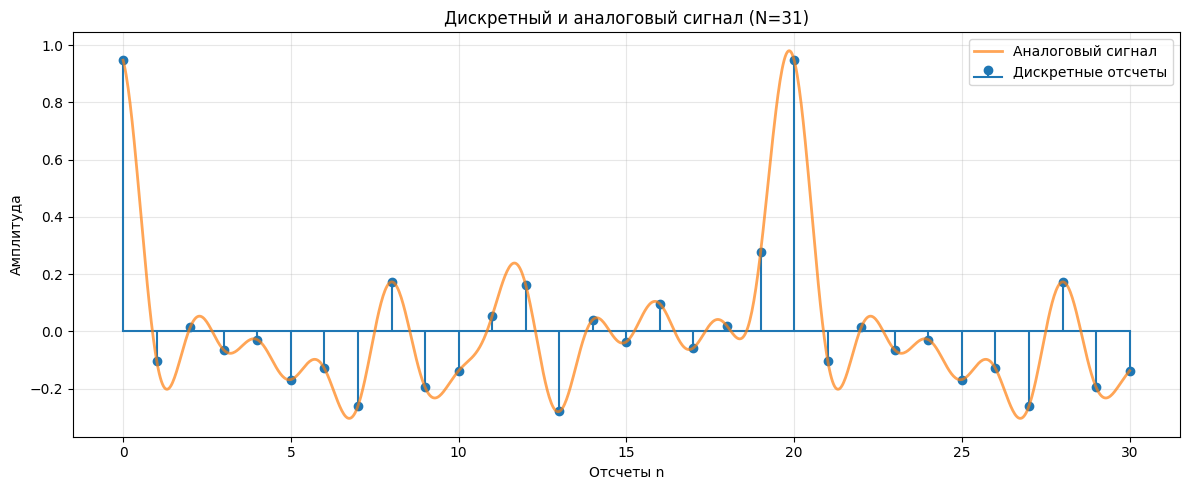

In [68]:
import numpy as np
import matplotlib.pyplot as plt

N = 31
x, amps, omegas, phases = generate_signal(N=N, seed=42)

fig, ax = plt.subplots(figsize=(12, 5)) 

n = np.arange(N)
ax.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt='C0-', label='Дискретные отсчеты')

t_dense = np.linspace(0, N-1, 1000)
x_analog = np.zeros_like(t_dense)
for amp, omega, phase in zip(amps, omegas, phases):
    x_analog += amp * np.cos(omega * t_dense + phase)

ax.plot(t_dense, x_analog, 'C1-', alpha=0.7, linewidth=2, label='Аналоговый сигнал')

ax.set_xlabel('Отсчеты n')
ax.set_ylabel('Амплитуда')
ax.set_title(f'Дискретный и аналоговый сигнал (N={N})')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Задание 3
Дискретное преобразование Фурье

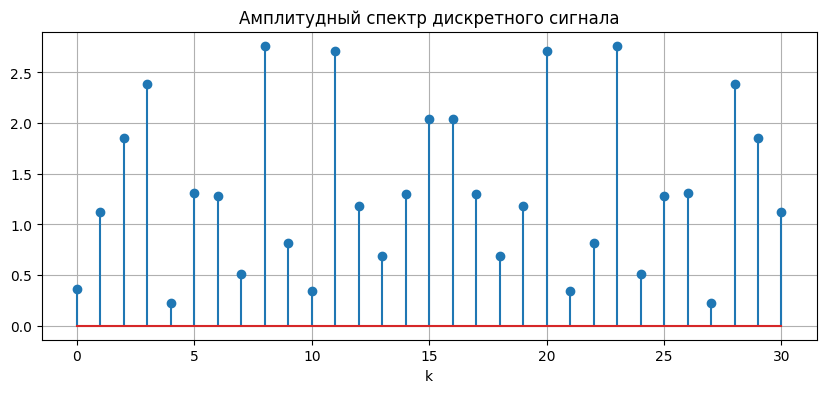

In [69]:
# -----------------
# ДПФ
# -----------------
X = np.fft.fft(x)
freq_bins = np.arange(N)

# -----------------
# Амплитудный спектр
# -----------------
plt.figure(figsize=(10, 4))
plt.stem(freq_bins, np.abs(X))
plt.title("Амплитудный спектр дискретного сигнала")
plt.xlabel("k")
plt.grid(True)
plt.show()


# Задания 4,5

### Линейное сглаживание дискретного сигнала по 5-ти и 9-ти точкам

Сглаживание осуществляется с помощью FIR-фильтра конечной длины (скользящего среднего).

### Определение фильтра

Фильтр по $M$ точкам:

$$
h[n] = 
\begin{cases}
\frac{1}{M}, & n = 0,1,\ldots,M-1 \\
0, & \text{иначе}
\end{cases}
$$

Здесь рассматриваем два фильтра:

- **5-точечный**: $ M = 5 $
- **9-точечный**: $ M = 9 $

### Частотная характеристика фильтра

Передаточная функция FIR-фильтра:

$$
H(\omega) = \frac{1}{M} \sum_{n=0}^{M-1} e^{-j\omega n}
$$

Аналитическая форма:

$$
H(\omega) = \frac{e^{-j\omega(M-1)/2}}{M} 
\cdot
\frac{\sin\left(\frac{M\omega}{2}\right)}{\sin\left(\frac{\omega}{2}\right)}
$$

Амплитудно-частотная характеристика:

$$
|H(\omega)| = \frac{1}{M}
\left|
\frac{\sin\left(\frac{M\omega}{2}\right)}{\sin\left(\frac{\omega}{2}\right)}
\right|
$$

Этот фильтр пропускает низкие частоты и подавляет высокие — то есть является **НЧ-фильтром**.


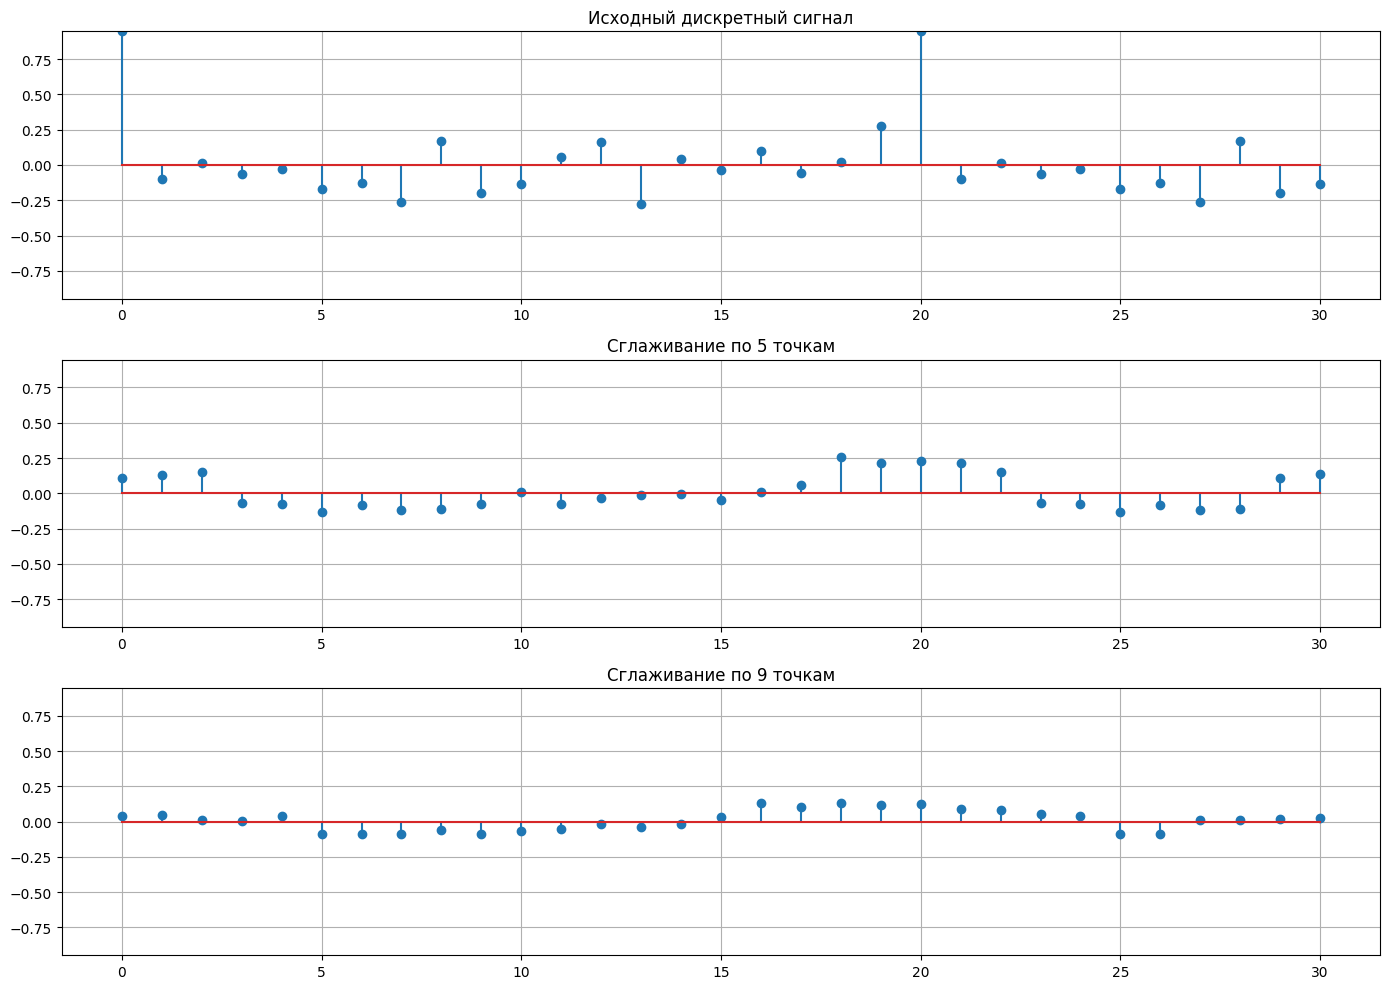

In [73]:
def apply_kernel_circular(signal: np.ndarray, kernel: np.ndarray) -> np.ndarray:
    """Круговая (циклическая) свертка как в эталонном коде"""
    pad_size = len(kernel) // 2
    # Дополняем сигнал с циклическим продолжением
    y_padded = np.pad(signal, (pad_size, pad_size), mode='wrap')
    # Линейная свертка с дополненным сигналом
    y_full = np.convolve(y_padded, kernel, mode='full')
    # Берем только центральную часть той же длины, что и исходный сигнал
    start_idx = len(kernel) - 1
    return y_full[start_idx:start_idx + len(signal)]

# Используем круговую свертку вместо mode='same'
h5 = np.ones(5) / 5
h9 = np.ones(9) / 9

y5 = apply_kernel_circular(x, h5)  # Заменяем np.convolve(x, h5, mode='same')
y9 = apply_kernel_circular(x, h9)   # Заменяем np.convolve(x, h9, mode='same')

n = np.arange(len(x))  # n от 0 до N
y_max = max(
    np.max(np.abs(x)),
    np.max(np.abs(y5)),
    np.max(np.abs(y9))
)

plt.figure(figsize=(14, 10))

plt.subplot(3, 1, 1)
plt.stem(n, x)
plt.title("Исходный дискретный сигнал")
plt.ylim(-y_max, y_max)
plt.grid(True)

plt.subplot(3, 1, 2)
plt.stem(n, y5)
plt.title("Сглаживание по 5 точкам")
plt.ylim(-y_max, y_max)
plt.grid(True)

plt.subplot(3, 1, 3)
plt.stem(n, y9)
plt.title("Сглаживание по 9 точкам")
plt.ylim(-y_max, y_max)
plt.grid(True)

plt.tight_layout()
plt.show()


# Задание 6

## Спектральный анализ: исходный и отфильтрованные сигналы

Вычисляем **ДПФ** исходного дискретного сигнала $x[n]$ и отфильтрованных сигналов $y_5[n]$ $(M=5)$ и $y_9[n]$ $(M=9)$.


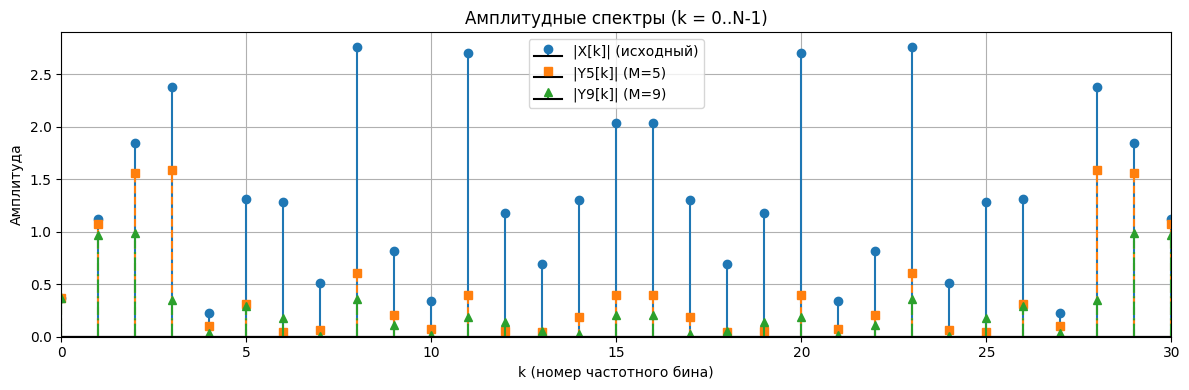

In [75]:
X = np.fft.fft(x, n=N)
Y5 = np.fft.fft(y5, n=N)
Y9 = np.fft.fft(y9, n=N)

mag_X  = np.abs(X)
mag_Y5 = np.abs(Y5)
mag_Y9 = np.abs(Y9)

k = np.arange(N)

ymax = max(mag_X.max(), mag_Y5.max(), mag_Y9.max())

plt.figure(figsize=(12,4))
plt.stem(k, mag_X,  linefmt='C0-', markerfmt='C0o', basefmt="k-", label='|X[k]| (исходный)')
plt.stem(k, mag_Y5, linefmt='C1--', markerfmt='C1s', basefmt="k-", label='|Y5[k]| (M=5)')
plt.stem(k, mag_Y9, linefmt='C2-.', markerfmt='C2^', basefmt="k-", label='|Y9[k]| (M=9)')
plt.title("Амплитудные спектры (k = 0..N-1)")
plt.xlabel("k (номер частотного бина)")
plt.ylabel("Амплитуда")
plt.ylim(0, ymax * 1.05)
plt.xlim(0, N-1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Задание 7

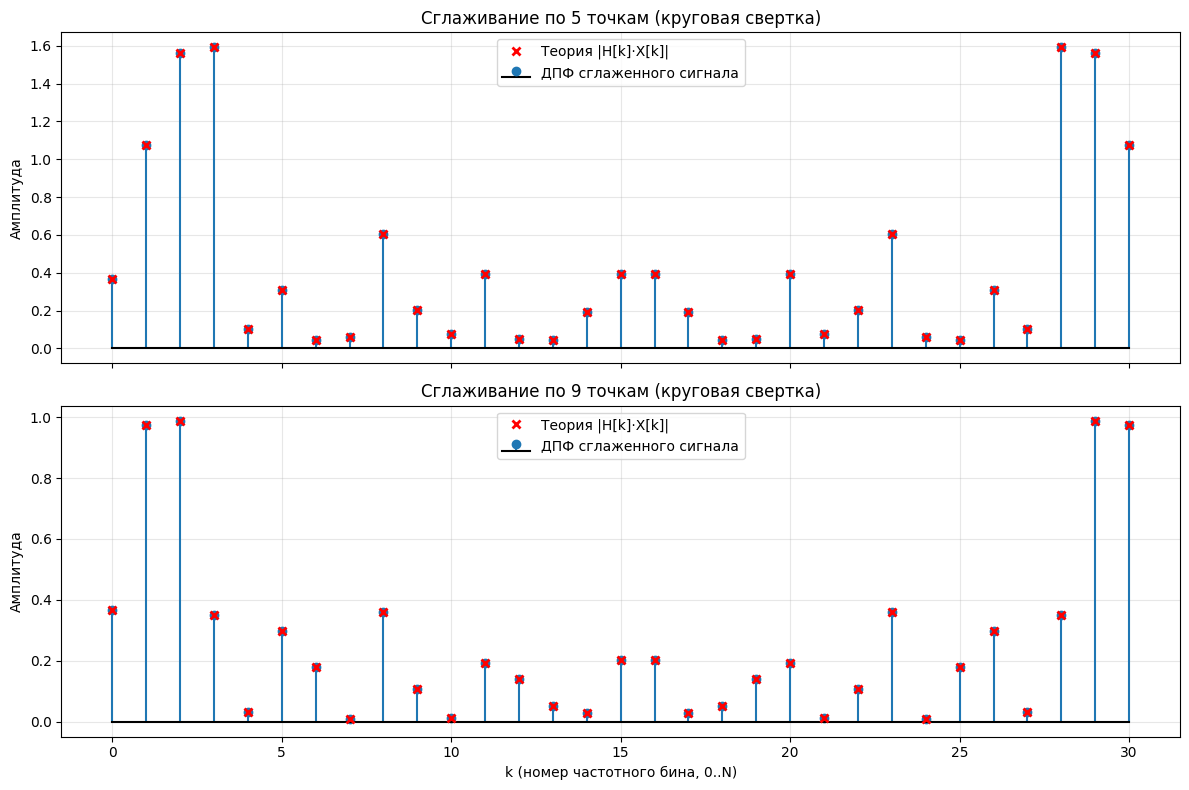

In [76]:
def H_moving_average_continuous(k, N_points, M):
    omega = k * 2 * np.pi / N_points  # Нормирование как в эталонном
    
    # Формула как в эталонном: sin(ωM/2) / (M sin(ω/2))
    omega_half = omega / 2
    numerator = np.sin(omega_half * M)
    denominator = M * np.sin(omega_half)
    
    H = np.ones_like(omega, dtype=complex)
    mask = np.abs(denominator) > 1e-12
    H[mask] = numerator[mask] / denominator[mask]
    
    # Фазовый сдвиг для симметричного окна
    H *= np.exp(-1j * omega * (M-1) / 2)
    
    return H

# Применяем для сравнения
N_points = len(x)  # N+1 точек
k_bins = np.arange(N_points)  # Бинарные частоты

# Вычисляем теоретические ЧХ
H5_cont = H_moving_average_continuous(k_bins, N_points, 5)
H9_cont = H_moving_average_continuous(k_bins, N_points, 9)

# Теоретический спектр после сглаживания
Y5_theory = H5_cont * np.fft.fft(x)
Y9_theory = H9_cont * np.fft.fft(x)

fig, axes = plt.subplots(2, 1, sharex=True, figsize=(12, 8))

Y5_actual = np.fft.fft(y5)
Y9_actual = np.fft.fft(y9)

for ax, Y_actual, Y_theory, window, title in zip(
    axes, 
    [Y5_actual, Y9_actual], 
    [Y5_theory, Y9_theory], 
    [5, 9],
    ["Сглаживание по 5 точкам (круговая свертка)", 
     "Сглаживание по 9 точкам (круговая свертка)"]
):
    ax.stem(k_bins, np.abs(Y_actual), linefmt='C0-', markerfmt='C0o', 
            basefmt='k-', label='ДПФ сглаженного сигнала')
    ax.plot(k_bins, np.abs(Y_theory), 'rx', markersize=6, 
            markeredgewidth=2, label='Теория |H[k]·X[k]|')
    ax.set_title(title)
    ax.set_ylabel("Амплитуда")
    ax.grid(True, alpha=0.3)
    ax.legend()

axes[-1].set_xlabel("k (номер частотного бина, 0..N)")
plt.tight_layout()
plt.show()

На графике наглядно видно, что теоретическая оценка совпадает со значениями сглаженного сигнала.

### Сглаживание полиномом второй степени по пяти и девяти узлам

Полиномиальные фильтры второго порядка позволяют сгладить колебания сигнала, не разрушая общую форму траектории. Такие фильтры фактически реализуют локальное аппроксимирование фрагмента последовательности параболой и вычисляют значение в центральной точке.

**Аппроксимация по пяти точкам**

Если для построения параболы используются пять равномерно распределённых отсчётов, то итоговая формула сглаживания принимает вид
$$
y_n=\frac{1}{35}\left(-3s_{n-2}+12s_{n-1}+17s_n+12s_{n+1}-3s_{n+2}\right).
$$

Весовые коэффициенты симметричны относительно центрального элемента, что обеспечивает отсутствие фазового сдвига. Передаточная функция такого фильтра получается подстановкой экспонент $e^{-j\omega k}$:
$$
H(\omega)=\frac{1}{35}\left(17+24\cos \omega - 6\cos 2\omega\right).
$$

Этот фильтр выполняет умеренное сглаживание: высокие частоты подавляются, но переходная область остаётся сравнительно широкой.

**Аппроксимация по девяти точкам**

При использовании большего окна — девяти отсчётов — парабола «видит» более длинный участок сигнала, что приводит к более сильному сглаживающему эффекту. Итоговое выражение выглядит так:
$$
y_n=\frac{1}{231}\left(-21s_{n-4}+14s_{n-3}+39s_{n-2}+54s_{n-1}+59s_n+54s_{n+1}+39s_{n+2}+14s_{n+3}-21s_{n+4}\right).
$$

Соответствующая частотная характеристика:
$$
H(\omega)=\frac{1}{231}\left(59+108\cos\omega+78\cos 2\omega + 28\cos 3\omega - 42\cos 4\omega \right).
$$

Расширение окна приводит к более выраженному подавлению высокочастотной составляющей и к более плавному результату на временной оси.

## Сглаживание полиномом четвёртой степени по семи и одиннадцати узлам

Фильтры более высокого порядка работают с полиномом степени 4. Они способны учитывать более сложные локальные изменения в сигнале, сохраняя кривизну и большие участки формы.

**Аппроксимация по семи точкам**

Если использовать окно размером семь элементов, то коэффициенты при аппроксимации имеют вид
$$
y_n=\frac{1}{231}\left(5s_{n-3}-30s_{n-2}+75s_{n-1}+131s_n+75s_{n+1}-30s_{n+2}+5s_{n+3}\right).
$$

Частотная характеристика для этого набора коэффициентов:
$$
H(\omega)=\frac{1}{231}\left(131+150\cos\omega - 60\cos 2\omega + 10\cos 3\omega\right).
$$

Такой фильтр обеспечивает более «умное» сглаживание по сравнению с параболическим: он лучше сохраняет вторую производную сигнала в центральной точке.

**Аппроксимация по одиннадцати точкам**

При расширении окна до одиннадцати узлов фильтр становится значительно более жёстким по отношению к высокочастотному шуму. Формула свёртки выглядит следующим образом:
$$
y_n=\frac{1}{429}\left(18s_{n-5}-45s_{n-4}-10s_{n-3}+60s_{n-2}+120s_{n-1}+143s_n+120s_{n+1}+60s_{n+2}-10s_{n+3}-45s_{n+4}+18s_{n+5}\right).
$$

Частотная характеристика:
$$
H(\omega)=\frac{1}{429}\left(143+240\cos\omega + 120\cos 2\omega - 20\cos 3\omega - 90\cos 4\omega + 36\cos 5\omega\right).
$$

Расширенное окно и высокая степень полинома дают практически максимальное сглаживание из всех рассмотренных вариантов, чётко отделяя плавную низкочастотную компоненту от колебаний и шума.

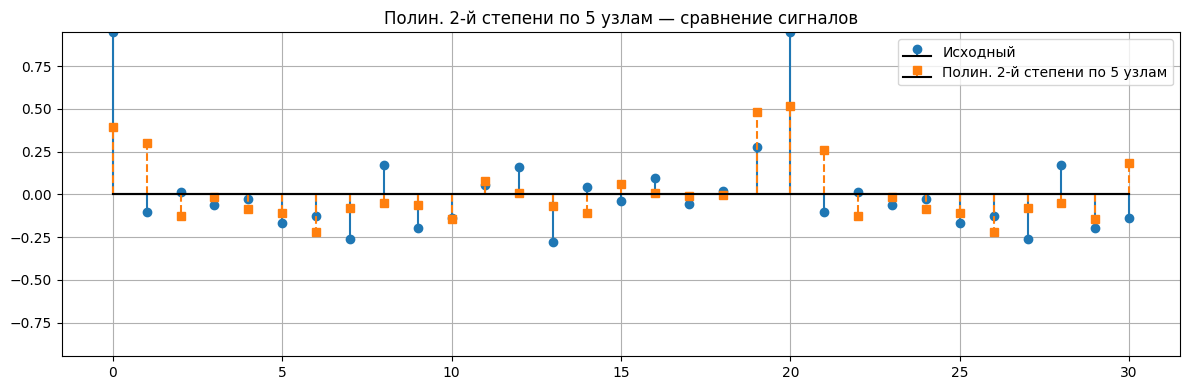

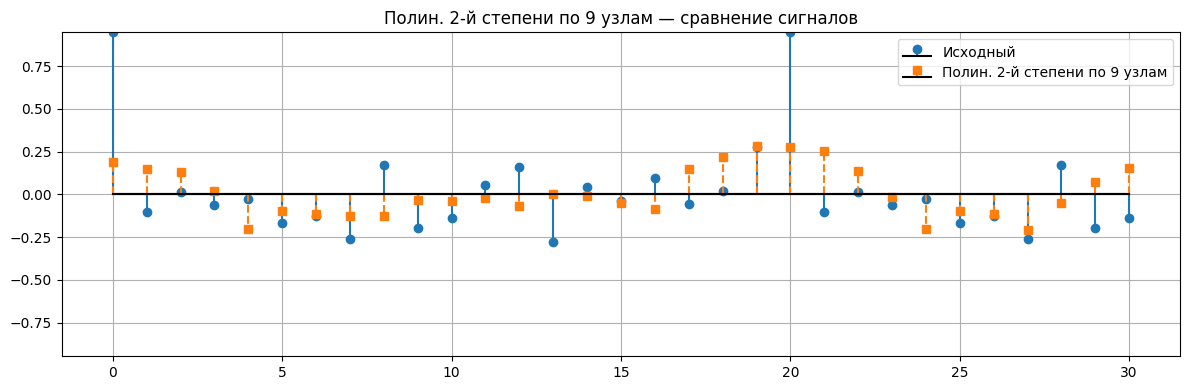

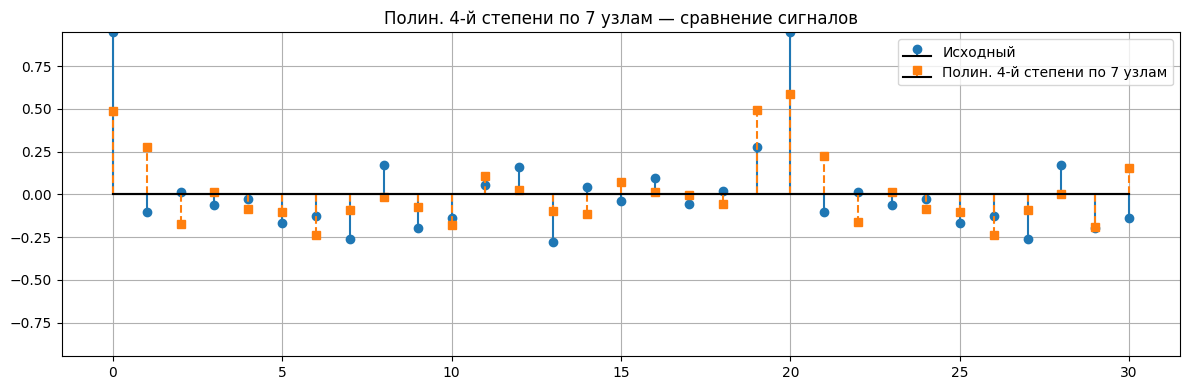

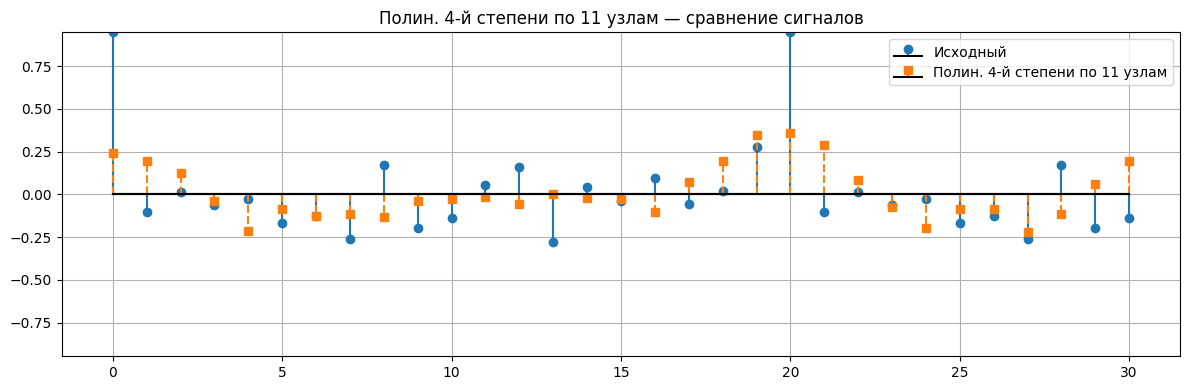

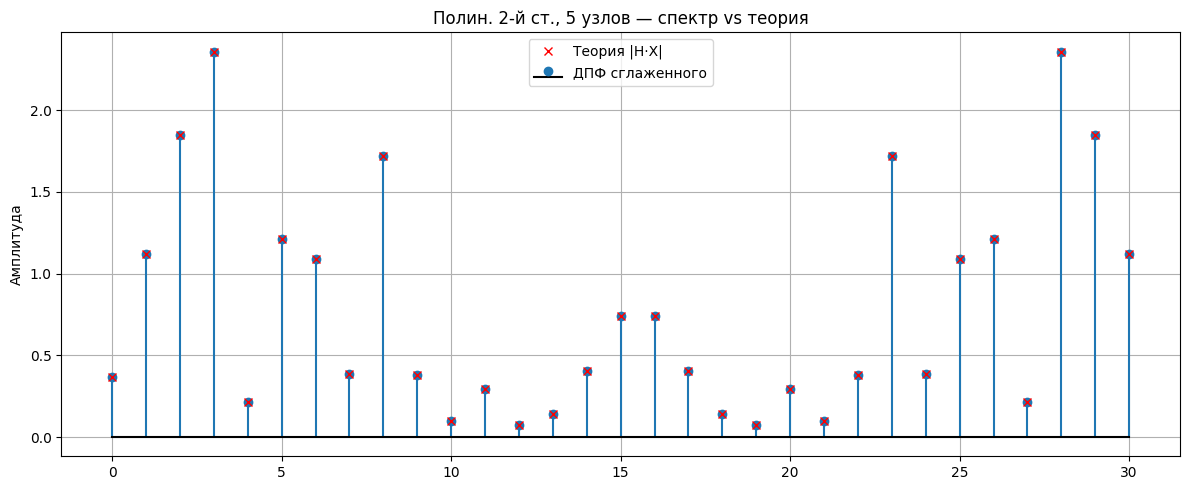

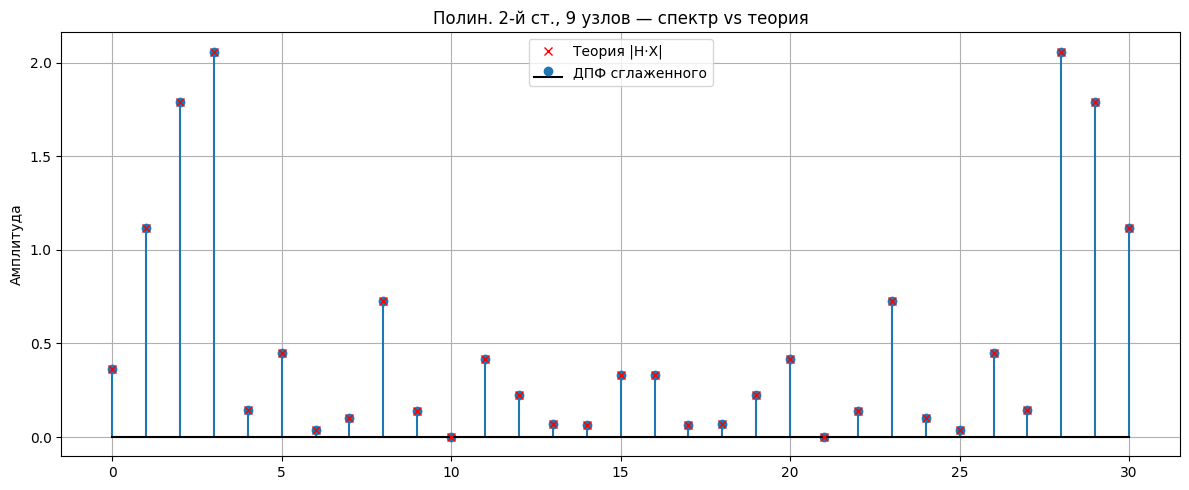

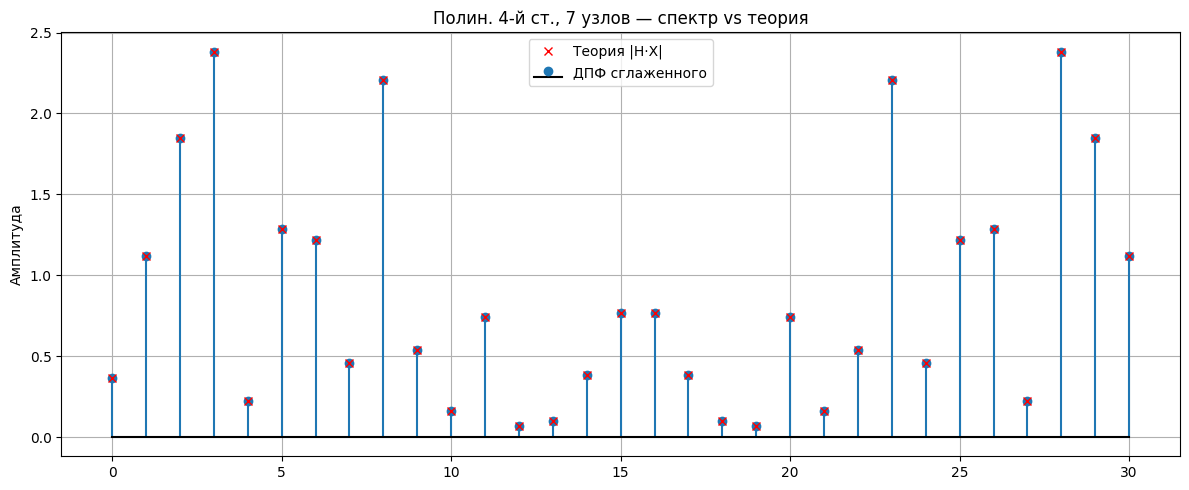

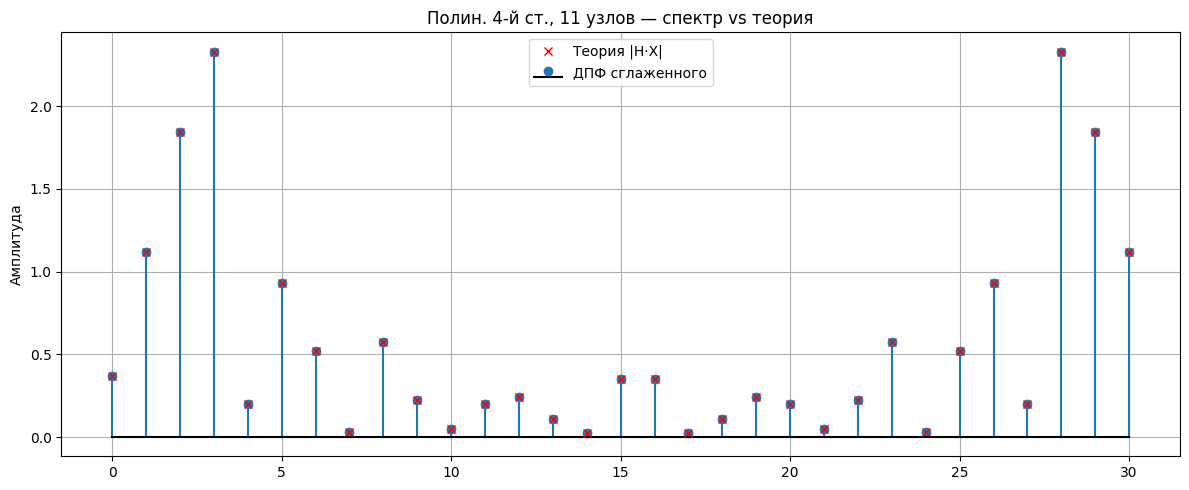

In [84]:
h_p2_5 = np.array([-3, 12, 17, 12, -3]) / 35
h_p2_9 = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231
h_p4_7 = np.array([5, -30, 75, 131, 75, -30, 5]) / 231
h_p4_11 = np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429

y_p2_5  = apply_kernel_circular(x, h_p2_5)
y_p2_9  = apply_kernel_circular(x, h_p2_9)
y_p4_7  = apply_kernel_circular(x, h_p4_7)
y_p4_11 = apply_kernel_circular(x, h_p4_11)

filters = [
    (y_p2_5,  "Полин. 2-й степени по 5 узлам"),
    (y_p2_9,  "Полин. 2-й степени по 9 узлам"),
    (y_p4_7,  "Полин. 4-й степени по 7 узлам"),
    (y_p4_11, "Полин. 4-й степени по 11 узлам"),
]

ymax_all = max(np.max(np.abs(x)),
               np.max(np.abs(y_p2_5)),
               np.max(np.abs(y_p2_9)),
               np.max(np.abs(y_p4_7)),
               np.max(np.abs(y_p4_11)))

for y, title in filters:
    plt.figure(figsize=(12,4))
    plt.stem(n, x, linefmt='C0-', markerfmt='C0o', basefmt="k-", label='Исходный')
    plt.stem(n, y, linefmt='C1--', markerfmt='C1s', basefmt="k-", label=title)
    plt.title(title + " — сравнение сигналов")
    plt.ylim(-ymax_all, ymax_all)
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

def H_poly_p2_5(omega):
    return (17 + 24*np.cos(omega) - 6*np.cos(2*omega)) / 35

def H_poly_p2_9(omega):
    return (59 + 108*np.cos(omega) + 78*np.cos(2*omega) +
            28*np.cos(3*omega) - 42*np.cos(4*omega)) / 231

def H_poly_p4_7(omega):
    return (131 + 150*np.cos(omega) - 60*np.cos(2*omega)
            + 10*np.cos(3*omega)) / 231

def H_poly_p4_11(omega):
    return (143 + 240*np.cos(omega) + 120*np.cos(2*omega)
            - 20*np.cos(3*omega) - 90*np.cos(4*omega) +
            36*np.cos(5*omega)) / 429

H_funcs = [
    (H_poly_p2_5,  "Полин. 2-й ст., 5 узлов",  y_p2_5),
    (H_poly_p2_9,  "Полин. 2-й ст., 9 узлов",  y_p2_9),
    (H_poly_p4_7,  "Полин. 4-й ст., 7 узлов",  y_p4_7),
    (H_poly_p4_11, "Полин. 4-й ст., 11 узлов", y_p4_11),
]

omega = 2*np.pi*k_bins/N_points
X_full = np.fft.fft(x)

for Hf, title, y in H_funcs:
    Hvals = Hf(omega)
    Y_theory = Hvals * X_full
    Y_actual = np.fft.fft(y)

    plt.figure(figsize=(12,5))
    plt.stem(k_bins, np.abs(Y_actual), linefmt='C0-', markerfmt='C0o',
             basefmt='k-', label="ДПФ сглаженного")
    plt.plot(k_bins, np.abs(Y_theory), 'rx', label="Теория |H·X|")
    plt.title(title + " — спектр vs теория")
    plt.ylabel("Амплитуда")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()



---
# **Вывод**

1. **Формирование сигнала.**
   Был сгенерирован непрерывный сигнал из одиннадцати косинусоид с частотами от 0 до π и случайными амплитудами и фазами. Дискретизация с шагом T = 1 дала дискретную последовательность из 32 точек, которая корректно повторяет форму исходного аналогового сигнала.

2. **Спектральный анализ исходного сигнала.**
   ДПФ показало наличие выраженных спектральных линий на тех частотах, где находились гармоники. Это подтверждает корректность синтеза и отсутствие искажений при дискретизации.

3. **Линейное сглаживание (5 и 9 точек).**
   Сигнал был отфильтрован окнами усреднения, и для каждого фильтра была записана частотная характеристика $(H(\omega))$. Полученные сглаженные сигналы стали более плавными, а высокочастотные компоненты заметно уменьшились — что полностью соответствует теоретическому поведению усредняющих фильтров.

4. **Сравнение спектров «до» и «после» линейного сглаживания.**
   Высокочастотные пики в спектре после фильтрации просажены в той степени, в которой предсказывает $(H(\omega))$. Окно из 9 точек подавляет высокие частоты сильнее, чем окно из 5 точек.

5. **Полиномиальные фильтры 2-й степени (5 и 9 узлов).**
   Эти фильтры сглаживают сигнал, но заметно лучше сохраняют форму, чем простое усреднение. Снижение высоких частот присутствует, но структура сигнала и «изгибы» остаются более точными.

6. **Полиномиальные фильтры 4-й степени (7 и 11 узлов).**
   Фильтры более высокого порядка ещё лучше сохраняют форму сигнала при сглаживании. Широкие окна дают более сильное подавление высоких частот, но при этом по минимуму искажают общую структуру.

7. **Интерпретация результатов.**

   * Скользящее среднее — сильное сглаживание, но сильное же искажение формы.
   * Полиномиальные фильтры — мягкое сглаживание при хорошем сохранении геометрии сигнала.
   * Увеличение окна всегда усиливает подавление высоких частот.
   * Все наблюдаемые изменения соответствуют аналитическим частотным характеристикам фильтров.

